In [1]:
import pandas as pd
import numpy as np

Loading dataset

In [2]:
ep4 = pd.read_csv("C:/Users/Study/OneDrive/Desktop/DU/Business_Intelligence/Labs/Lab4/star_wars_movies_scripts/SW_EpisodeIV.txt",delimiter=' ',on_bad_lines='skip')
ep5 = pd.read_csv("C:/Users/Study/OneDrive/Desktop/DU/Business_Intelligence/Labs/Lab4/star_wars_movies_scripts/SW_EpisodeV.txt",delimiter=' ',on_bad_lines='skip')
ep6 = pd.read_csv("C:/Users/Study/OneDrive/Desktop/DU/Business_Intelligence/Labs/Lab4/star_wars_movies_scripts/SW_EpisodeVI.txt",delimiter=' ',on_bad_lines='skip')


In [3]:
ep4.head()

,character,dialogue
1,THREEPIO,Did you hear that? They've shut down the main...
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the l...


In [4]:
ep5.head()

,character,dialogue
1,LUKE,"Echo Three to Echo Seven. Han, old buddy, do y..."
2,HAN,"Loud and clear, kid. What's up?"
3,LUKE,"Well, I finished my circle. I don't pick up an..."
4,HAN,There isn't enough life on this ice cube to fi...
5,LUKE,Right. I'll see you shortly. There's a meteori...


In [5]:
ep6.head()

,character,dialogue
1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc..."
2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...
3,SHUTTLE CAPTAIN,We're starting our approach.
4,OFFICER,Inform the commander that Lord Vader's shuttle...
5,OPERATOR,"Yes, sir."


Step 1. Characters with the most dialogues in each episode of The Original
Trilogy

In [6]:
print("Character with most dialogs in Episode 4")
ep4["character"].mode()


Character with most dialogs in Episode 4


0    LUKE
Name: character, dtype: object

In [7]:
print("Character with most dialogs in Episode 5")
ep5["character"].mode()

Character with most dialogs in Episode 5


0    HAN
Name: character, dtype: object

In [8]:
print("Character with most dialogs in Episode 6")
ep6["character"].mode()

Character with most dialogs in Episode 6


0    HAN
Name: character, dtype: object

Step 2. Plot the number of dialogues according to the character for each episode 

Text(0.5, 1.0, 'Top 5 Dialog count for Episode 4')

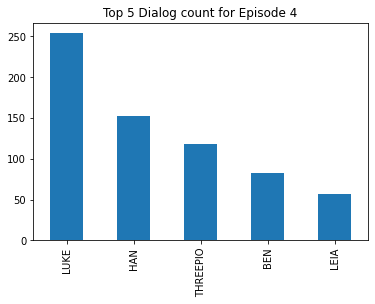

In [9]:
import matplotlib.pyplot as plt

x = ep4["character"]
y = ep4["character"].value_counts().head(5)
y.plot.bar(x="Character",y="count")
plt.title("Top 5 Dialog count for Episode 4")


Text(0.5, 1.0, 'Top 5 Dialog count for Episode 5')

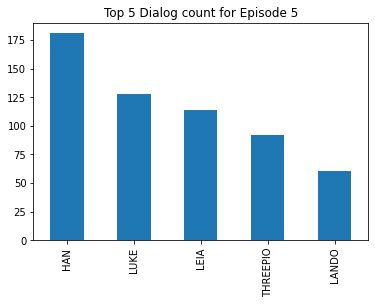

In [10]:
y = ep5["character"].value_counts().head(5)
y.plot.bar(x="Character",y="count")
plt.title("Top 5 Dialog count for Episode 5")

Text(0.5, 1.0, 'Top 5 Dialog count for Episode 6')

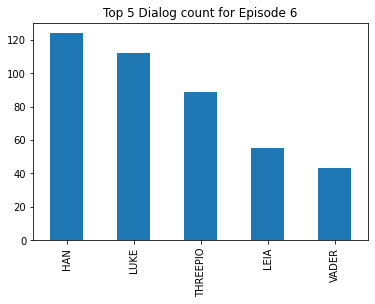

In [11]:
y = ep6["character"].value_counts().head(5)
y.plot.bar(x="Character",y="count")
plt.title("Top 5 Dialog count for Episode 6")

Step 3. Add a new column “episode” to the three datasets and concatenate them to make a new dataset

In [12]:
ep4["Episode"] = 4
ep5["Episode"] = 5
ep6["Episode"] = 6
trio = pd.concat([ep4, ep5,ep6], axis=0)
trio.head(10)

,character,dialogue,Episode
1,THREEPIO,Did you hear that? They've shut down the main...,4
2,THREEPIO,We're doomed!,4
3,THREEPIO,There'll be no escape for the Princess this time.,4
4,THREEPIO,What's that?,4
5,THREEPIO,I should have known better than to trust the l...,4
6,LUKE,Hurry up! Come with me! What are you waiting...,4
7,THREEPIO,"Artoo! Artoo-Detoo, where are you?",4
8,THREEPIO,At last! Where have you been?,4
9,THREEPIO,They're heading in this direction. What are we...,4
10,THREEPIO,"Wait a minute, where are you going?",4


Step 4. Discover the frequency distribution of words in The Original Trilogy

In [13]:
#join text together
text = " ".join(trio.dialogue.values)


In [14]:
# create text array
text_tok = text.split()
text_tok[:5]


['Did', 'you', 'hear', 'that?', "They've"]

In [15]:
# freq distribution
from nltk.probability import FreqDist
freq_tok = FreqDist(text_tok)
freq_tok.most_common(15)


[('the', 792),
 ('I', 662),
 ('to', 636),
 ('you', 561),
 ('a', 415),
 ('of', 342),
 ('your', 242),
 ('is', 238),
 ('be', 229),
 ('have', 199),
 ('in', 199),
 ('and', 185),
 ('for', 179),
 ('You', 175),
 ("I'm", 168)]

Step 5. Create a Frequency Distribution plot of the most repeated words in The Original
Trilogy

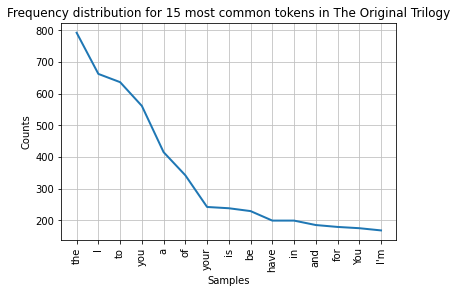

<AxesSubplot:title={'center':'Frequency distribution for 15 most common tokens in The Original Trilogy'}, xlabel='Samples', ylabel='Counts'>

In [16]:
#plot
freq_tok.plot(15,title='Frequency distribution for 15 most common tokens in The Original Trilogy')

Step 6. Prepare your dataset for further text analysis
 
a. Convert to lower case, word tokenization, removing stopwords, lexicon
normalization (lemmatization), etc.

b. Add the resulting array list to the dataset as a new column, “new_script”.

In [17]:
new_text = trio["dialogue"]
#lower case
#tokenize
new_text = new_text.str.lower()
new_text = new_text.str.split()
new_text.head()


1    [did, you, hear, that?, they've, shut, down, t...
2                                     [we're, doomed!]
3    [there'll, be, no, escape, for, the, princess,...
4                                      [what's, that?]
5    [i, should, have, known, better, than, to, tru...
Name: dialogue, dtype: object

In [18]:
#create stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

new_text = new_text.apply(lambda x: [item for item in x if item not in stop_words])
new_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Study\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1      [hear, that?, they've, shut, main, reactor., w...
2                                       [we're, doomed!]
3                    [there'll, escape, princess, time.]
4                                        [what's, that?]
5      [known, better, trust, logic, half-sized, ther...
                             ...                        
670             [wedge,, think, we're, going, make, it.]
671                   [make, it., follow, gold, leader.]
672    [promised, return, ship, without, scratch...i,...
673                                           [lando...]
674                                                [it!]
Name: dialogue, Length: 2519, dtype: object

In [19]:
#lammentize the text
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wnl = WordNetLemmatizer()
new_script = [[wnl.lemmatize(w, "v") for w in t] for t in new_text]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Study\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Study\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
trio["new_script"] = new_script

In [21]:
trio.head()

,character,dialogue,Episode,new_script
1,THREEPIO,Did you hear that? They've shut down the main...,4,"[hear, that?, they've, shut, main, reactor., w..."
2,THREEPIO,We're doomed!,4,"[we're, doomed!]"
3,THREEPIO,There'll be no escape for the Princess this time.,4,"[there'll, escape, princess, time.]"
4,THREEPIO,What's that?,4,"[what's, that?]"
5,THREEPIO,I should have known better than to trust the l...,4,"[know, better, trust, logic, half-sized, therm..."


Step 7. Repeat steps 4 & 5, but check the frequency distribution of the “new_script” this time.

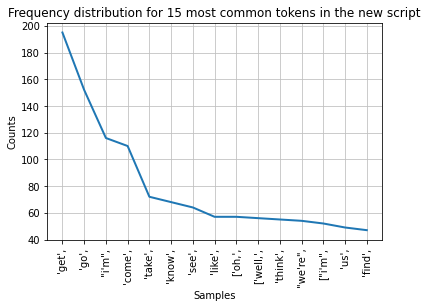

<AxesSubplot:title={'center':'Frequency distribution for 15 most common tokens in the new script'}, xlabel='Samples', ylabel='Counts'>

In [22]:
text = " ".join(str(i) for i in trio.new_script.values)
text_tok = text.split()
freq_tok = FreqDist(text_tok)
freq_tok.most_common(15)
freq_tok.plot(15,title='Frequency distribution for 15 most common tokens in the new script')

Step 8. Use Word Clouds to visually represent the most repeated words for Darth Vader and
Yoda

In [23]:
# Load libraries
!pip install wordcloud
# !pip install --upgrade wheel
#!pip install wordcloud
from wordcloud import WordCloud
from PIL import Image



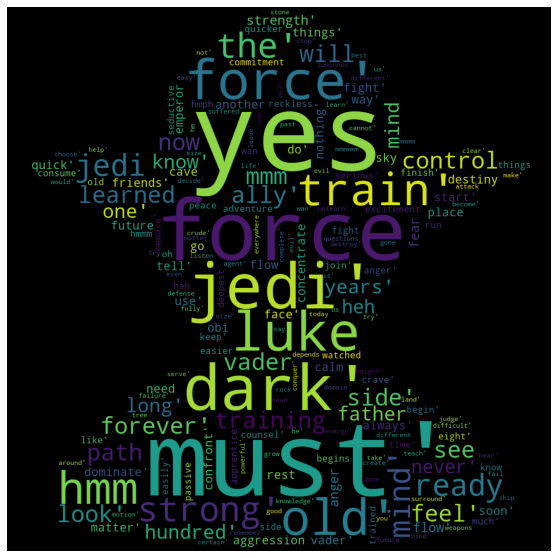

In [24]:
#Yoda
yoda = trio[(trio["character"]== "YODA")].new_script.values
yoda = " ".join(str(i) for i in yoda)
plt.subplots(figsize=(10,10))
picture = Image.open("C:/Users/Study/OneDrive/Desktop/DU/Business_Intelligence/Labs/Lab4/wordcloud_masks/yoda.png")
wordcloud = WordCloud(mask = np.array(picture)).generate(yoda)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

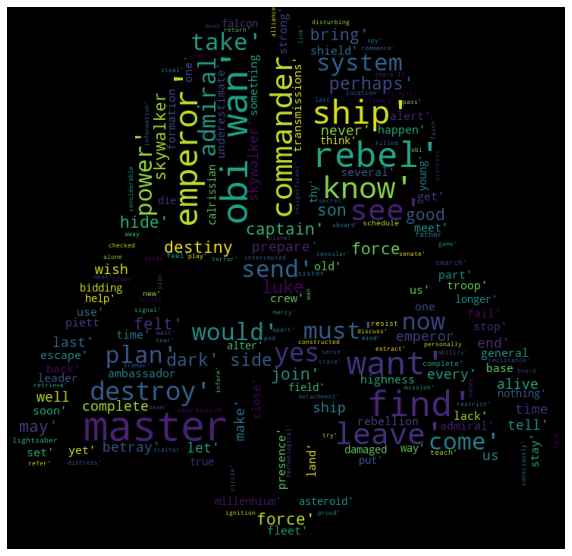

In [25]:
#Vader
vader = trio[(trio["character"]== "VADER")].new_script.values
vader = " ".join(str(i) for i in vader)
plt.subplots(figsize=(10,10))
picture = Image.open("C:/Users/Study/OneDrive/Desktop/DU/Business_Intelligence/Labs/Lab4/wordcloud_masks/vader.jpg")
wordcloud = WordCloud(mask = np.array(picture)).generate(vader)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Step 9. Discover the most relevant words in The Original Trilogy script.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
text = " ".join(str(i) for i in trio.new_script.values)
tv = TfidfVectorizer(use_idf=True, analyzer='word', stop_words= 'english')

vectors = tv.fit_transform([text])
vectors

<1x2263 sparse matrix of type '<class 'numpy.float64'>'
	with 2263 stored elements in Compressed Sparse Row format>

In [27]:
result = pd.DataFrame(vectors[0].T.todense(), 
                      index = tv.get_feature_names_out (),
                      columns = ["Importance Score"])
result.sort_values("Importance Score", ascending = False).head(10)

,Importance Score
come,0.282331
luke,0.251165
know,0.234665
ll,0.218165
oh,0.207165
right,0.207165
ve,0.168665
sir,0.164999
think,0.161332
artoo,0.155832


Step 10. Perform sentiment analysis on the movie scripts

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Study\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
#For Luke
luke_char =trio[trio["character"]== "LUKE"].dialogue.values
luke_char = " ".join(luke_char)
luke_char
sa_luke = sa.polarity_scores(luke_char)
sa_luke


{'neg': 0.11, 'neu': 0.742, 'pos': 0.148, 'compound': 0.9995}

In [30]:
#For YODA
yoda_char =trio[trio["character"]== "YODA"].dialogue.values
yoda_char = " ".join(yoda_char)
yoda_char
sa_yoda = sa.polarity_scores(yoda_char)
sa_yoda


{'neg': 0.129, 'neu': 0.693, 'pos': 0.178, 'compound': 0.9923}

In [31]:
#For Vader
vader_char =trio[trio["character"]== "VADER"].dialogue.values
vader_char = " ".join(vader_char)
vader_char
sa_vader = sa.polarity_scores(vader_char)
sa_vader

{'neg': 0.11, 'neu': 0.724, 'pos': 0.166, 'compound': 0.9984}

In [32]:
#For Emperor
emperor_char =trio[trio["character"]== "EMPEROR"].dialogue.values
emperor_char = " ".join(emperor_char)
emperor_char
sa_emperor = sa.polarity_scores(emperor_char)
sa_emperor

{'neg': 0.129, 'neu': 0.705, 'pos': 0.167, 'compound': 0.9883}

### Result:

To analyse the relationship betwen the dark and light side character we take into consideration following character:
Luke; Yoda; Vader; Emperor

From the polarity scores we can see that there is similarity between dark and light characters. For instance, Luke and Vader have the same negative score. The is also true for Yoda and Emperor. We also see dissimilarities between the characters. We see Yoda (light character) has a higher positive score than Vader (dark character), which makes sense. Although, we fail to see a consistency in pattern based on scores of just these 4 characters, it is still safe to say that there is a definite relationship between light and dark character.